In [9]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#### dataset path

In [10]:
file_path="/home/age/KAIM-Projects/data/sierraleone-bumbuna.csv"

In [11]:
df = pd.read_csv(file_path)


In [12]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [14]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [15]:
null_counts =df.isnull().sum()
null_counts

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [16]:
high_null = null_counts[null_counts/len(df) > 0.05]
high_null

Comments    525600
dtype: int64

In [17]:
df['GHI']=df['GHI'].apply(lambda x: x if x>0 else 0)
df['DNI']=df['DNI'].apply(lambda x: x if x>0 else 0)
df['DHI']=df['DHI'].apply(lambda x: x if x>0 else 0)

In [18]:
check_outlier =['GHI','DNI','DHI','ModA','ModB','Tamb','RH','WS','WSgust']
z_scores= df[check_outlier].apply(zscore)
outlier_flags = (z_scores.abs()>3).any(axis=1)

outlier_flags

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [19]:
outlier_flags

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [20]:
df.shape

(525600, 19)

In [21]:
df_clean=df[~outlier_flags].reset_index(drop=True)

In [22]:
df_clean.shape

(504377, 19)

In [23]:
df_clean=df_clean.dropna( axis=1)

In [24]:
df_clean.to_csv('../data/sierraleone_clean.csv', index=False)

#### Data visualization for Cleaned Data

In [25]:
benin = pd.read_csv('../data/sierraleone_clean.csv',parse_dates=['Timestamp'])
benin.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01:00,0.0,0.0,0.0,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02:00,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03:00,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04:00,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05:00,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


In [26]:
benin['Timestamp']= pd.to_datetime(benin['Timestamp'])


In [27]:
benin['Hour'] = benin['Timestamp'].dt.hour
benin['Day'] = benin['Timestamp'].dt.date
benin['Month'] = benin['Timestamp'].dt.month

In [28]:
daily_avg = benin.groupby('Hour')[['GHI', 'DNI', 'DHI','Tamb']].mean()

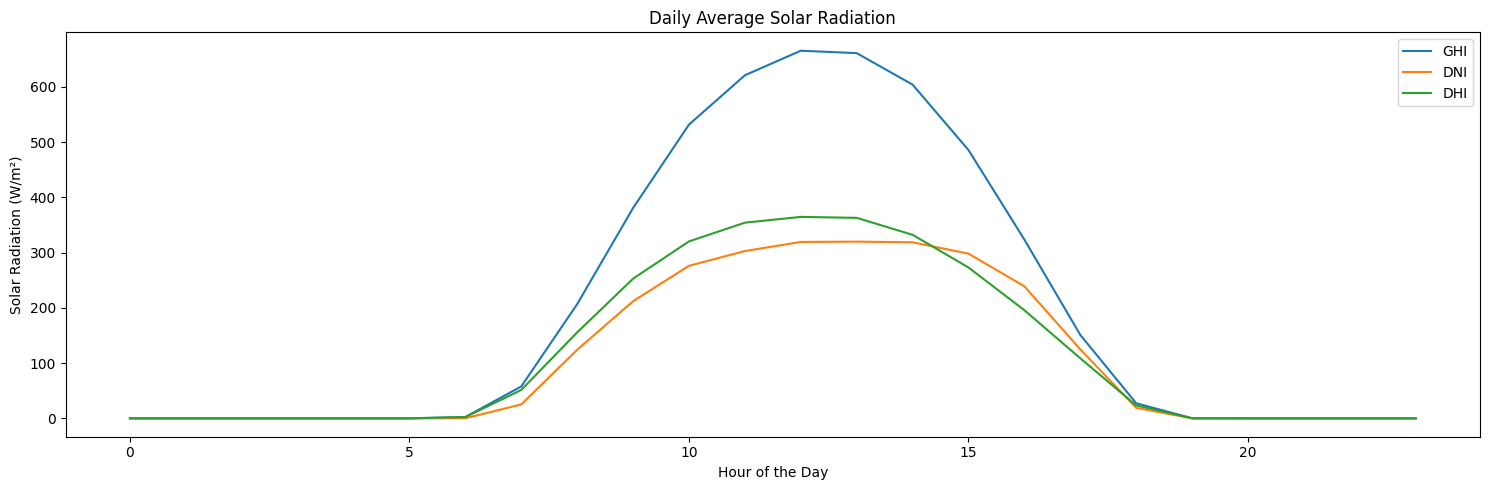

In [29]:
plt.figure(figsize=(15, 5))
for col in ['GHI', 'DNI', 'DHI']:
    plt.plot(daily_avg.index, daily_avg[col], label=col)
plt.title('Daily Average Solar Radiation')
plt.xlabel('Hour of the Day')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/sierraleone_daily_avg_solar_radiation.png')
plt.show()

## Key Solar Radiation Patterns
###### Peak Sun Hours: The highest radiation occurs around midday (~12 PM–2 PM), typical for most locations.

###### GHI Curve: Follows a bell-shaped pattern, peaking at noon when the sun is highest.

##### DMI vs. DHI:

###### DMI is high when skies are clear (direct sunlight dominates).

###### DHI increases if there’s cloud cover or atmospheric scattering.

##### Sunrise/Sunset Effects:

###### Low GHI/DHI in early morning/late evening (sun is low).

###### DMI drops sharply near sunrise/sunset (direct sunlight angle becomes unfavorable).

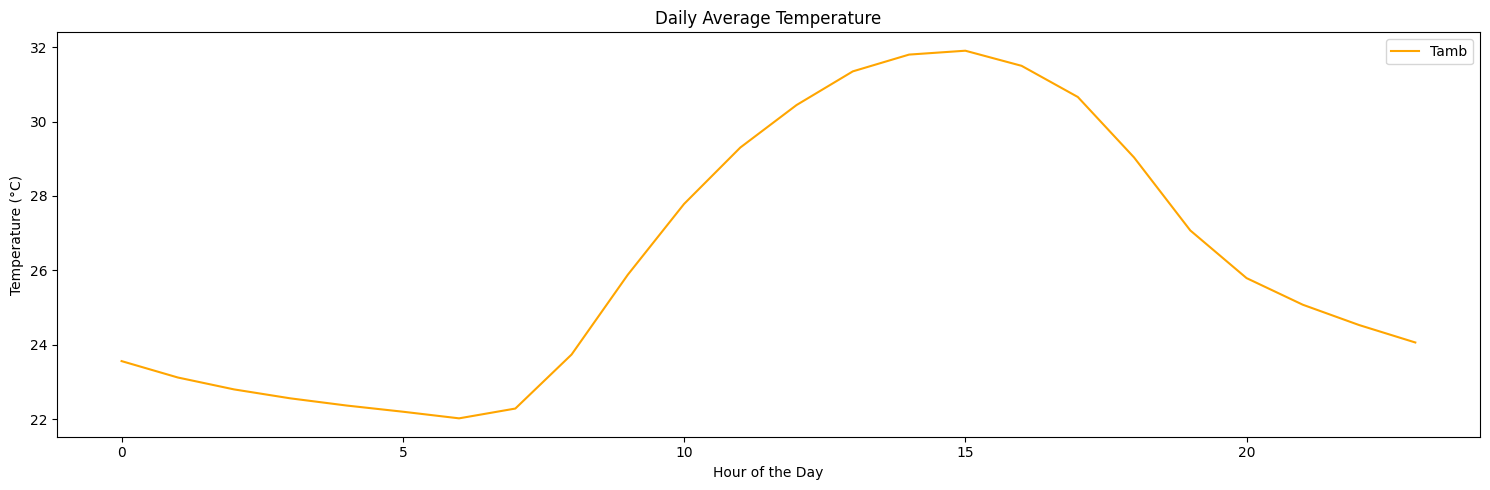

In [30]:
plt.figure(figsize=(15, 5))

plt.plot(daily_avg.index, daily_avg['Tamb'], label='Tamb', color='orange')
plt.title('Daily Average Temperature')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/sierraleone_daily_avg_temperature.png')
plt.show()

###### Diurnal Cycle: The curve follows the expected daily temperature variation:

In [31]:
monthly_avg = benin.groupby('Month')[['GHI', 'DNI', 'DHI','Tamb']].mean()


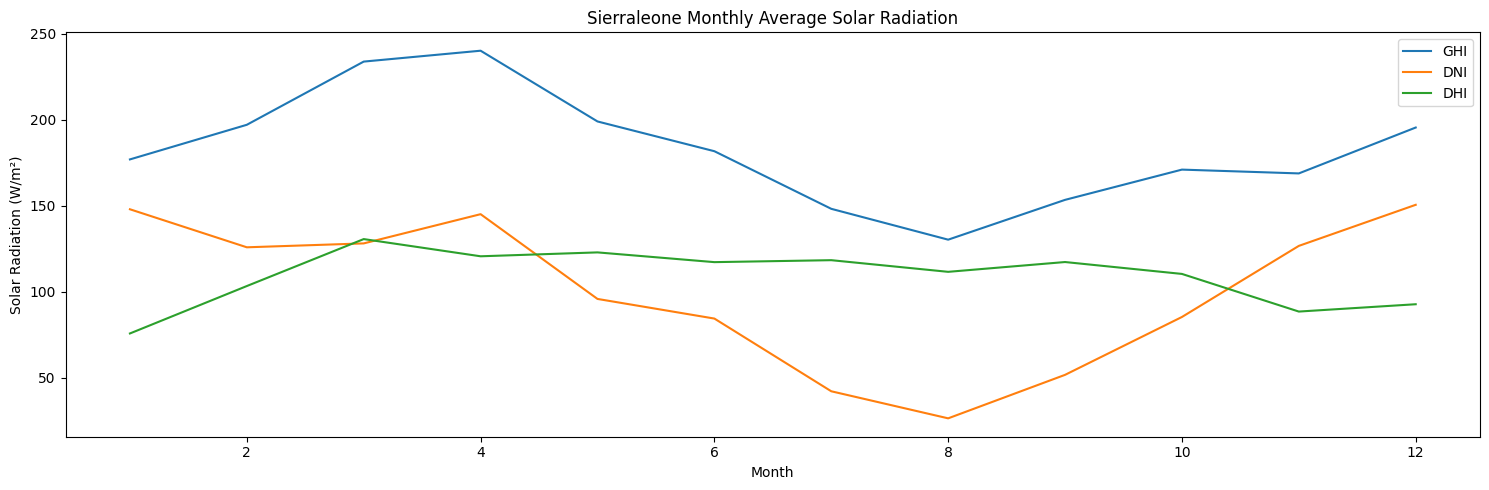

In [32]:
plt.figure(figsize=(15, 5))
# monthly_avg[['GHI', 'DNI', 'DHI']].plot(kind='bar')
for col in ['GHI', 'DNI', 'DHI']:
    plt.plot(monthly_avg.index, monthly_avg[col], label=col)
plt.title('Sierraleone Monthly Average Solar Radiation')
plt.xlabel('Month')
plt.ylabel('Solar Radiation (W/m²)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.savefig('../figures/sierraleone_monthly_avg_solar_radiation.png')
plt.show()

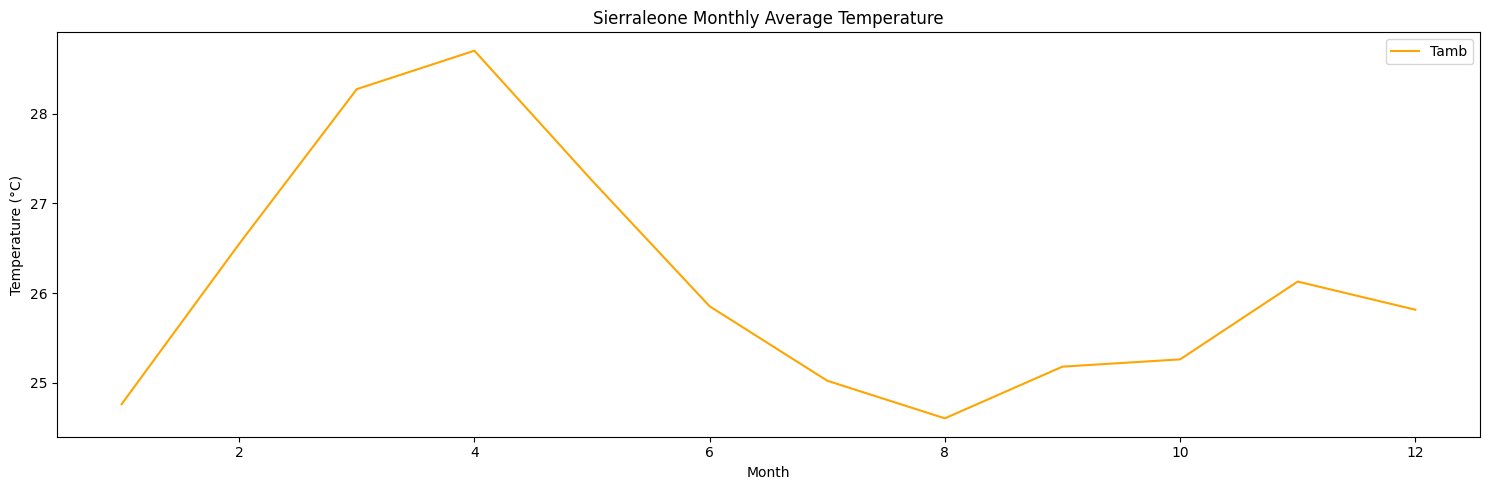

In [33]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_avg.index, monthly_avg['Tamb'], label='Tamb', color='orange')
plt.title('Sierraleone Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.savefig('../figures/sierraleone_monthly_avg_temperature.png')
plt.show()

###### cleaning Impact

In [5]:
module_avg= benin.groupby('Cleaning')[['ModA', 'ModB']].mean()

NameError: name 'benin' is not defined

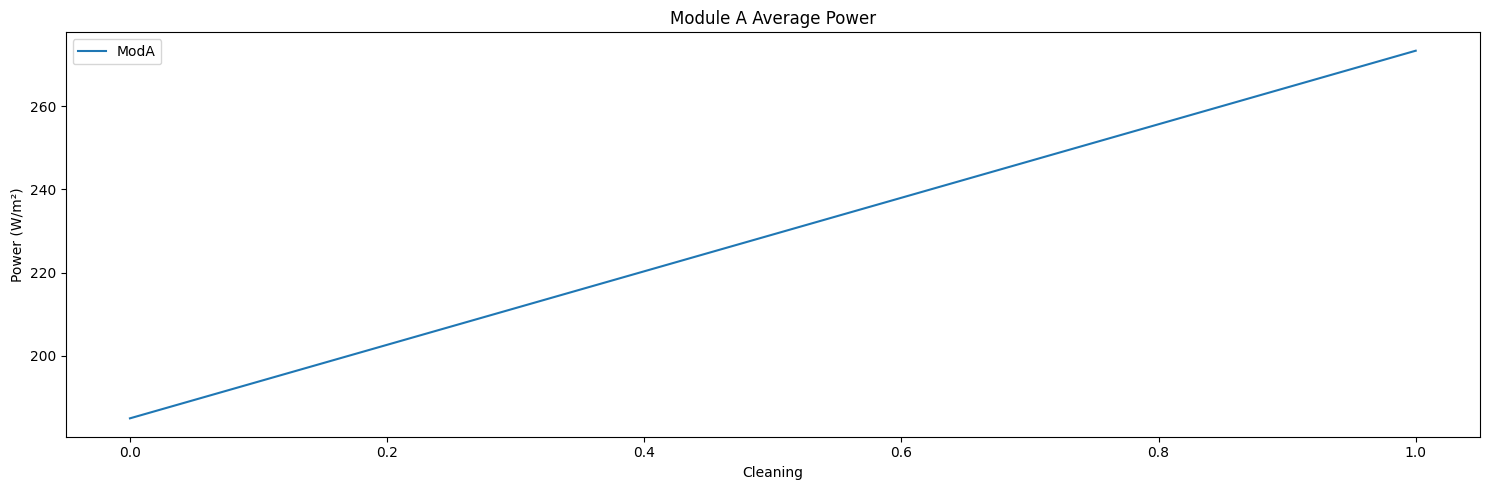

In [45]:
plt.figure(figsize=(15, 5))

plt.plot(module_avg.index, module_avg['ModA'], label='ModA')
plt.title('Module A Average Power')
plt.xlabel('Cleaning')
plt.ylabel('Power (W/m²)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.savefig('../figures/sierraleone_module_a_avg_power.png')
plt.show()

In [46]:
corr_cols =['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

In [47]:
benin[corr_cols].corr()

,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.858807,0.882734,0.923233,0.911738
DNI,0.858807,1.000000,0.550572,0.803317,0.796804
DHI,0.882734,0.550572,1.000000,0.825848,0.821985
TModA,0.923233,0.803317,0.825848,1.000000,0.993119
TModB,0.911738,0.796804,0.821985,0.993119,1.000000


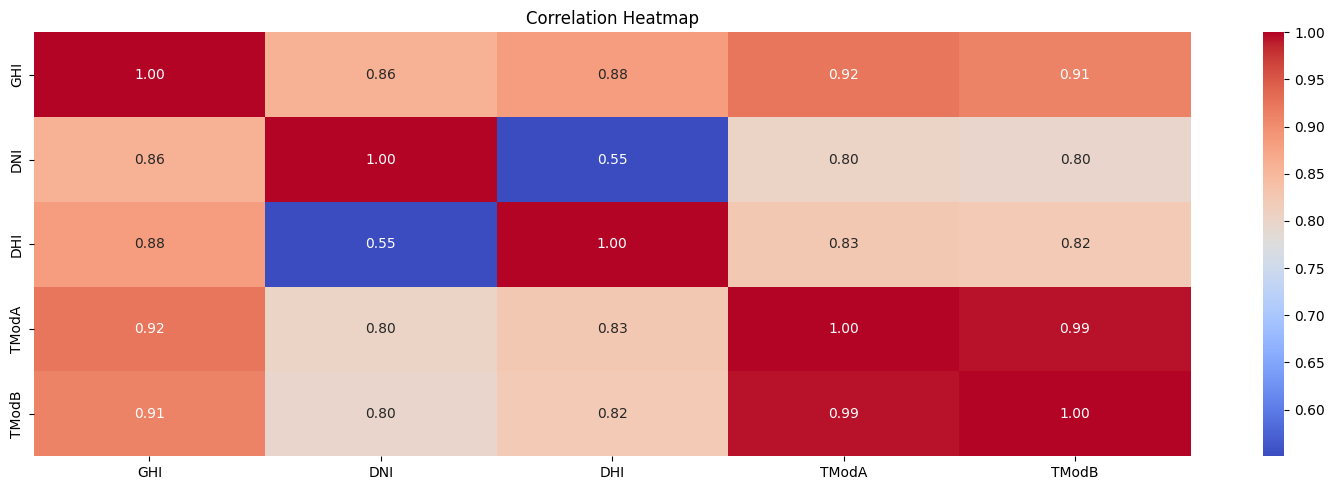

In [48]:
plt.figure(figsize=(15, 5))
sns.heatmap(benin[corr_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('../figures/sierraleone_correlation_heatmap.png')
plt.show()

/tmp/ipykernel_74595/4068141266.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


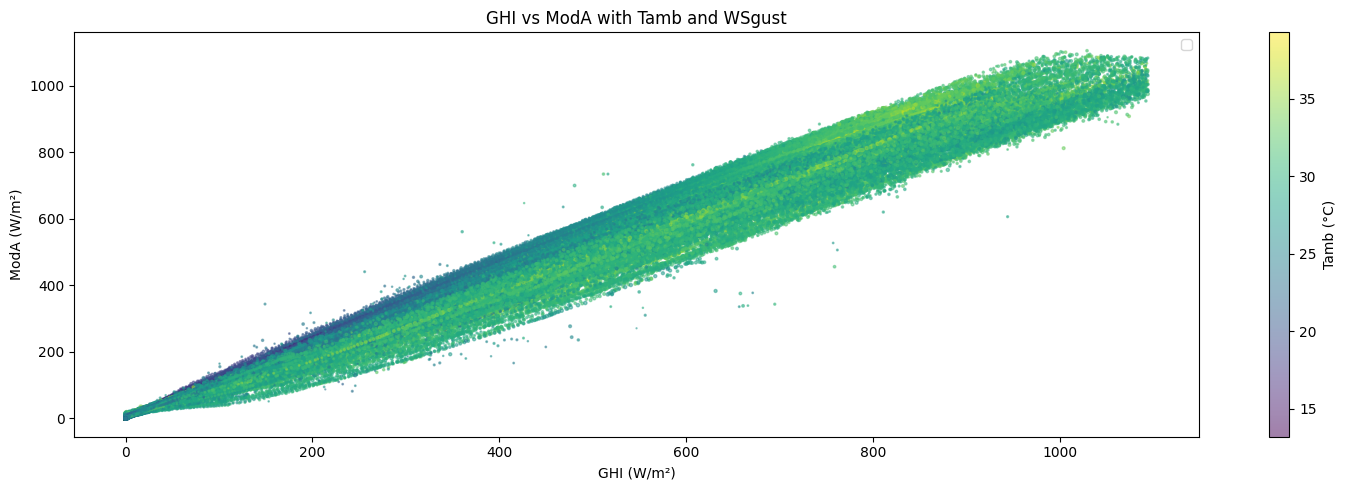

In [ ]:
plt.figure(figsize=(15, 5))

plt.scatter(benin['GHI'], benin['ModA'],benin['WSgust'], alpha=0.5, c=benin['Tamb'], cmap='viridis')
plt.title('GHI vs ModA with Tamb and WSgust')
plt.xlabel('GHI (W/m²)')
plt.ylabel('ModA (W/m²)')
plt.colorbar(label='Tamb (°C)')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/sierraleone_ghi_vs_modA.png')
plt.show()